In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

### For test and debug

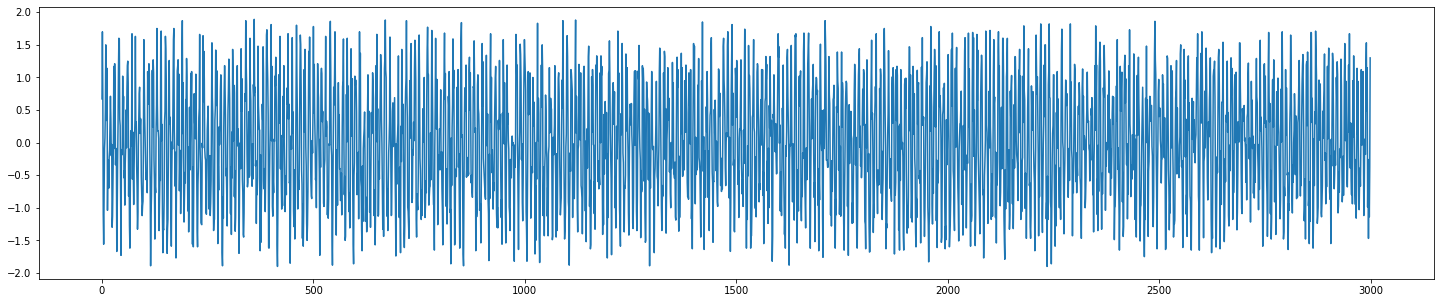

In [2]:
Fs = 100
freq = 10
t= np.arange(3000)
RandFreq = np.cos(2*np.pi*freq/Fs*t) + np.random.choice(np.arange(-0.9, 0.9, 0.01), 3000)

plt.figure(figsize=(25, 5))
plt.plot(RandFreq)

EEG sim

In [20]:
def make_simdata(num):
    
    EEGsim = []
    for i in range(num):
        RandFreq = np.cos(2*np.pi*freq/Fs*t) + np.random.choice(np.arange(-0.9, 0.9, 0.01), 3000)
        EEGsim.append(RandFreq)
    EEGsim = np.expand_dims(np.array(EEGsim), axis=-1)

    BISsim = np.expand_dims(np.random.choice(np.arange(0.1, 1, 0.001), num), axis=-1)
    
    return EEGsim, BISsim

In [21]:
EEG, BIS = make_simdata(1000)

In [22]:
EEG.shape, BIS.shape

((1000, 3000, 1), (1000, 1))

In [ ]:
EEGsimTR, BISsimTR = make_simdata(1000)
np.save('../ProcessedData/EEGsim_Train.npy', EEGsimTR)
np.save('../ProcessedData/BISsim_Train.npy', BISsimTR)

In [ ]:
EEGsimVal, BISsimVal = make_simdata(500)
np.save('../ProcessedData/EEGsim_Val.npy', EEGsimVal)
np.save('../ProcessedData/BISsim_Val.npy', BISsimVal)

Test

In [51]:
EEGmin = EEGsim.min()
EEGmax = EEGsim.max()
testEEG = (EEGsim - EEGmin)/(EEGmax-EEGmin)

In [67]:
RandFreq2d = np.reshape(testEEG[0], (30, 100))
RandFreq2d_fft =  np.fft.rfft(RandFreq2d)

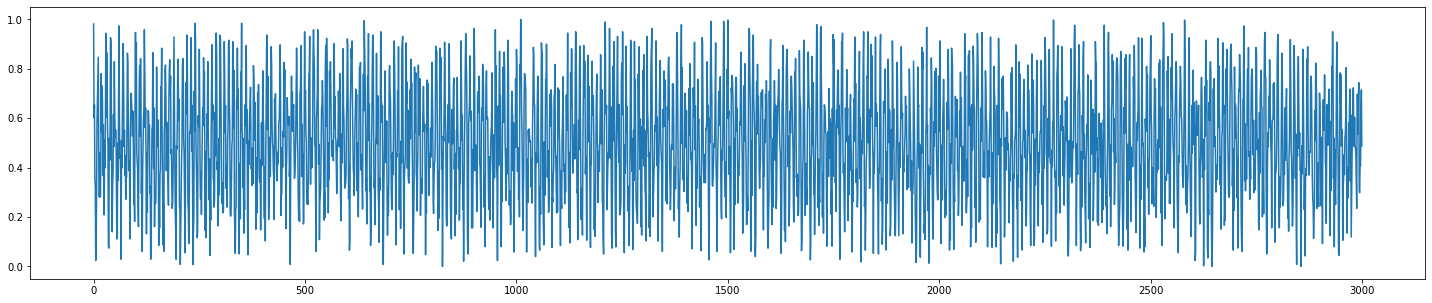

In [72]:
plt.figure(figsize=(25, 5))
plt.plot(testEEG[0])

C:\Users\Eugene Hwang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


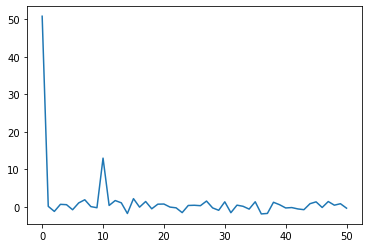

In [68]:
plt.plot(RandFreq2d_fft[0])

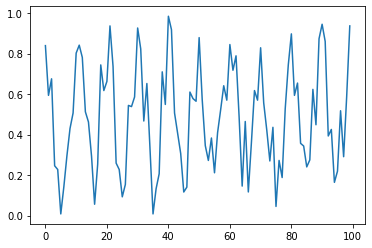

In [69]:
plt.plot(np.fft.irfft(RandFreq2d_fft)[2])

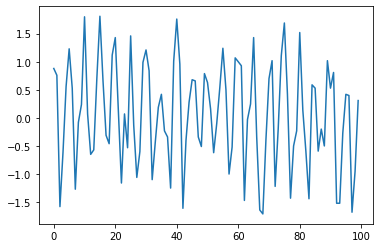

In [228]:
plt.plot(np.fft.irfft(RandFreq2d_fft)[2])

### EEG-BIS Simluated data generation

#### ① BIS generation

In [122]:
NormBIS = np.random.rand(500)

#### ② Function for EEG generation

In [143]:

def EEGGen (NormVal):
    
    '''
    0.0 ~ 0.2 :  1~4
    0.2 ~ 0.4 :  4~7
    0.4 ~ 0.6 :  8~12
    0.6 ~ 0.8 :  12~30
    0.8 ~ 1.0 :  30~50    
    '''

    # Frequency generation
    if NormVal >= 0 and NormVal < 0.2:
        RandFreq = np.random.choice(np.arange(1, 4, 0.5))
    elif NormVal >= 0.2 and NormVal < 0.4:
        RandFreq = np.random.choice(np.arange(4, 7, 0.5))
    elif NormVal >= 0.4 and NormVal < 0.6:
        RandFreq = np.random.choice(np.arange(8, 12, 0.5))
    elif NormVal >= 0.6 and NormVal < 0.8:
        RandFreq = np.random.choice(np.arange(12, 30, 0.5))
    else:
        RandFreq = np.random.choice(np.arange(30, 50, 0.5))

    Fs = 100
    t= np.arange(3000)
    RandEEG = np.cos(2*np.pi*RandFreq/Fs*t) + np.random.choice(np.arange(-0.5, 0.5, 0.01), 3000)
    NormEEG = (RandEEG - RandEEG.min()) / (RandEEG.max()-RandEEG.min())

    # Test codes
    RandEEG2d = np.reshape(RandEEG, (30, 100))
    RandEEG2d_fft =  np.fft.rfft(RandEEG2d)
    #plt.plot(RandEEG2d_fft[0])
    print(NormVal, RandFreq, np.argmax(RandEEG2d_fft[0]))
    
    return NormEEG[None]

#### ③ EEG generation

In [144]:
NormEEG = []

for val in NormBIS:
    NormEEG.append(EEGGen(val))
    
NormEEG = np.concatenate(NormEEG)    

0.8162605992065909 43.5 4
0.6240893019934731 25.5 23
0.7219087724616239 29.5 32
0.4521683833707133 9.5 10
0.8255085779094825 41.5 6
0.5616401793367398 8.5 13
0.8345031969716864 41.0 41
0.4963288901221773 10.5 26
0.7407421913214444 22.0 22
0.999951146450371 46.5 32
0.874177580037384 48.0 48
0.19845419961254762 2.5 43
0.7506885749747612 17.5 25
0.859313455682055 36.0 36
0.3773735279456767 5.5 24
0.7431635678878199 14.5 25
0.13807022015798753 2.0 2
0.10027127136297109 2.5 41
0.24856233451121512 5.5 3
0.3455965655642661 4.5 40
0.41121362457758615 9.0 9
0.6791692117649853 22.0 22
0.31415111333478063 5.0 5
0.7689959288380124 20.0 20
0.6710625902505112 17.0 17
0.041302447385003216 2.0 2
0.6112907494129874 25.5 7
0.2313126728322551 5.5 50
0.6376948943384514 16.5 43
0.2046105584411212 5.5 28
0.24348497700838467 5.0 5
0.7423391177586791 29.5 50
0.05966324703322834 2.5 48
0.37933764667627456 4.5 14
0.7620690683639405 25.0 25
0.4982864543824439 9.0 9
0.3274143499261275 4.0 4
0.9401219294371791 49.

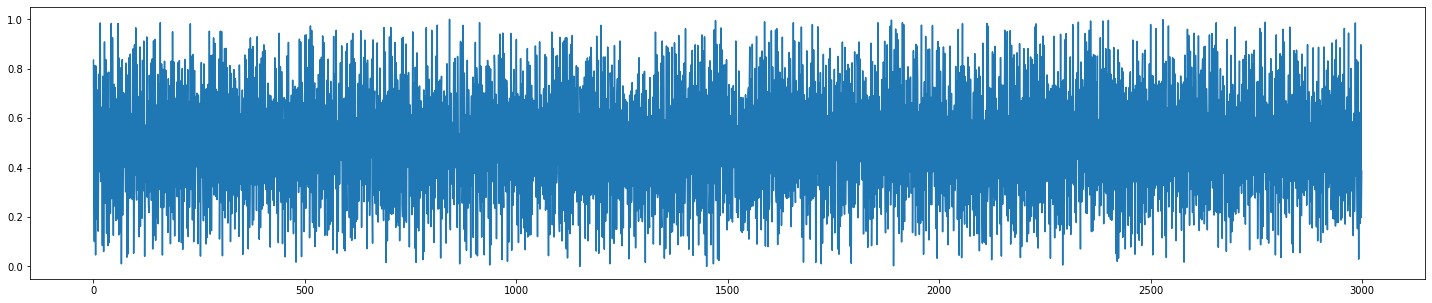

In [145]:

plt.figure(figsize=(25, 5))
plt.plot(NormEEG[60])